In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [265]:
df = pd.read_csv('health_lifestyle_classification.csv')

In [267]:
df.sample(5)

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,...,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
50520,50521,49,Male,170.870715,54.741596,18.749176,18.749176,56.247528,18.867051,74.512305,...,High,2,Moderate,No,No,0,NaN,5.5,-7.337869,healthy
84503,84504,73,Female,164.442759,64.461761,23.838156,23.838156,71.514468,23.781008,100.408931,...,Moderate,4,High,Yes,Yes,0,1.0,5.5,2.371126,healthy
16972,16973,73,Male,149.094801,41.729394,18.772282,18.772282,56.316847,18.961586,76.150078,...,Low,1,High,Yes,Yes,0,1.0,5.5,4.329836,healthy
33686,33687,72,Male,182.942807,49.777903,14.873251,14.873251,44.619754,15.165234,113.052569,...,Low,1,High,No,No,0,1.0,5.5,9.888395,healthy
58626,58627,44,Male,163.108833,72.047121,27.080811,27.080811,81.242434,27.462852,95.409287,...,Low,4,NaN,Yes,No,0,1.0,5.5,9.140535,healthy


In [268]:
df.drop(columns=['survey_code','insurance','device_usage'],axis = 1,inplace = True)

In [269]:
df.describe()

,age,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,heart_rate,...,water_intake,screen_time,stress_level,mental_health_score,income,meals_per_day,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,92331.000000,85997.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,91530.000000,100000.000000,100000.0,89526.0,100000.0,100000.000000
mean,48.525990,170.023707,70.064862,24.493876,24.493876,73.481627,24.494140,84.933043,119.980149,74.969177,...,2.006373,6.021525,4.991600,5.004680,4038.127284,2.998720,0.0,1.0,5.5,0.015726
std,17.886768,9.982798,14.693667,5.951069,5.951069,17.853206,5.954184,12.040314,15.015503,9.941668,...,0.688868,2.933835,3.154997,3.164228,1930.025678,1.414786,0.0,0.0,0.0,5.764489
min,18.000000,140.000000,40.000000,9.988495,9.988495,29.965484,9.893845,34.093185,59.128168,34.745092,...,0.500000,0.000000,0.000000,0.000000,500.000000,1.000000,0.0,1.0,5.5,-9.999895
25%,33.000000,163.306615,59.856938,20.271405,20.271405,60.814215,20.271059,76.795185,109.812060,68.275432,...,1.532011,3.971318,2.000000,2.000000,2665.402843,2.000000,0.0,1.0,5.5,-4.980501
50%,48.000000,170.016778,69.924141,24.156734,24.156734,72.470201,24.151699,84.957139,119.951794,75.046211,...,2.000659,5.991171,5.000000,5.000000,4004.601345,3.000000,0.0,1.0,5.5,0.015589
75%,64.000000,176.728920,80.027418,28.258696,28.258696,84.776088,28.247648,93.018713,130.120621,81.685914,...,2.473047,8.024470,8.000000,8.000000,5360.012694,4.000000,0.0,1.0,5.5,5.008424
max,79.000000,210.000000,139.250894,59.234792,59.234792,177.704377,59.142646,133.153631,184.439195,114.136041,...,5.000000,16.000000,10.000000,10.000000,12029.409353,5.000000,0.0,1.0,5.5,9.999966


In [270]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            skew = df[col].skew()
            if abs(skew) < 0.5:
                df[col].fillna(df[col].mean(), inplace=True)
            else:
                df[col].fillna(df[col].median(), inplace=True)


/var/folders/2_/s62gpcv54kq4_hjxpry6sprh0000gn/T/ipykernel_5792/29303517.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/var/folders/2_/s62gpcv54kq4_hjxpry6sprh0000gn/T/ipykernel_5792/29303517.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [271]:
from sklearn.preprocessing import OrdinalEncoder
target_order = [['diseased','healthy']]

oe = OrdinalEncoder(categories=target_order)

df['target'] = oe.fit_transform(df[['target']])
df['target'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: target, dtype: float64

<Axes: xlabel='target', ylabel='age'>

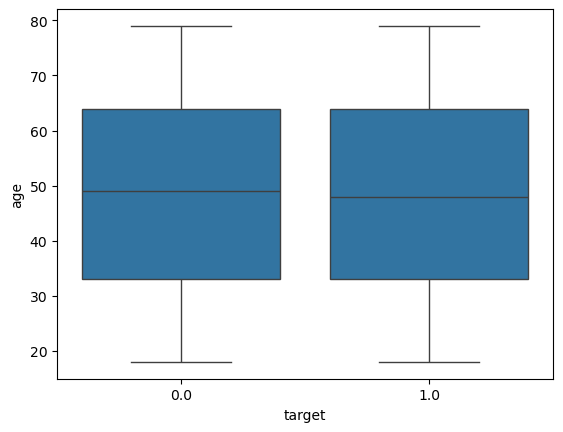

In [272]:
sns.boxplot(x='target', y='age', data=df)

<Axes: xlabel='target', ylabel='height'>

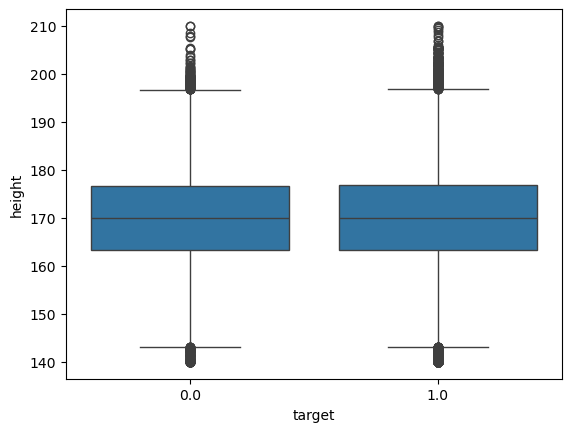

In [273]:
sns.boxplot(x='target', y='height', data=df)

In [274]:
# Step 1: Calculate IQR
Q1 = df['height'].quantile(0.25)
Q3 = df['height'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter the entire dataframe
df = df[(df['height'] >= lower_bound) & (df['height'] <= upper_bound)].reset_index(drop=True)


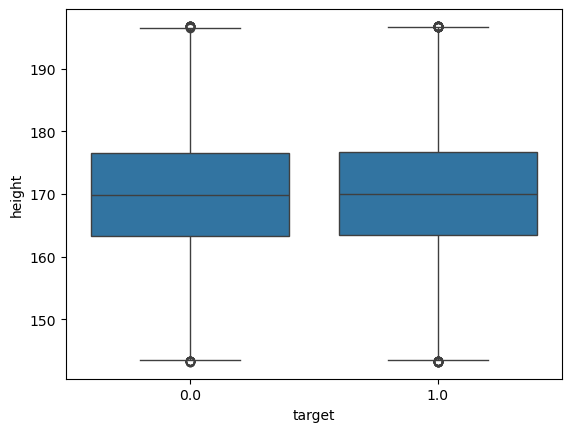

In [275]:
sns.boxplot(x='target',y='height',data=df)
plt.show()

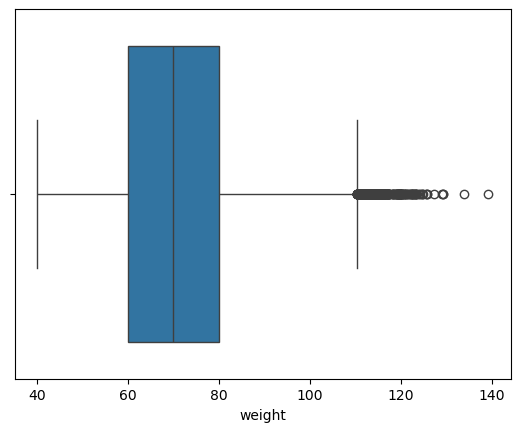

In [276]:
sns.boxplot(x='weight',data=df)
plt.show()

In [277]:
# Step 1: Calculate Q1, Q3, and IQR
Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove rows with outlier weight values
df = df[(df['weight'] >= lower_bound) & (df['weight'] <= upper_bound)].reset_index(drop=True)


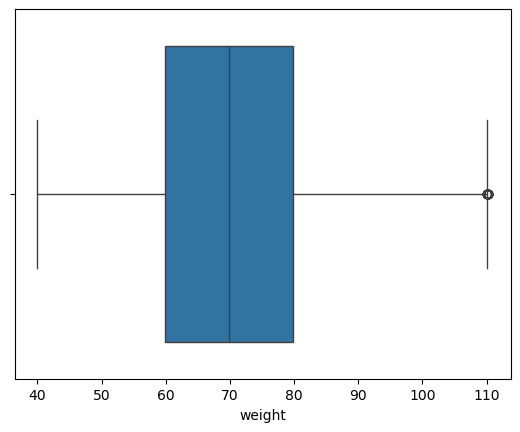

In [278]:
sns.boxplot(x='weight',data=df)
plt.show()

In [279]:
# Step 1: Calculate Q1, Q3, and IQR
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove rows with outlier weight values
df = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)].reset_index(drop=True)


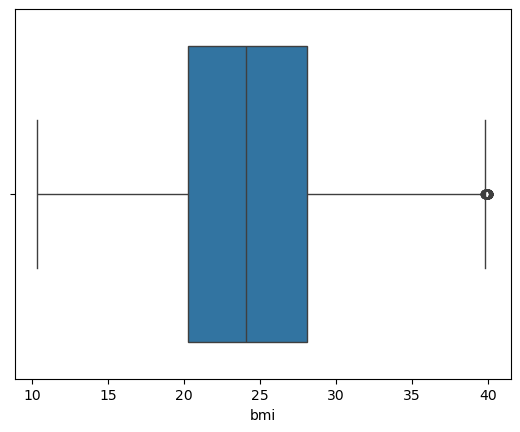

In [280]:
sns.boxplot(x='bmi',data=df)
plt.show()

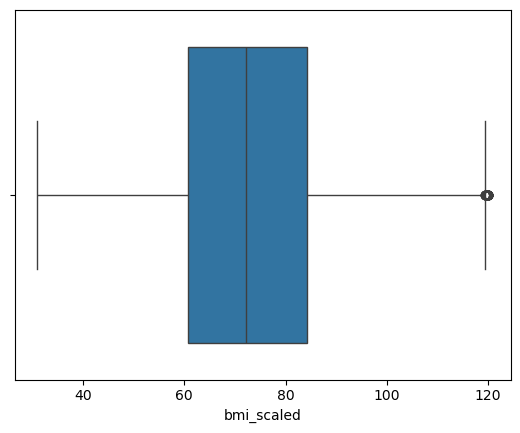

In [281]:
sns.boxplot(x='bmi_scaled',data=df)
plt.show()

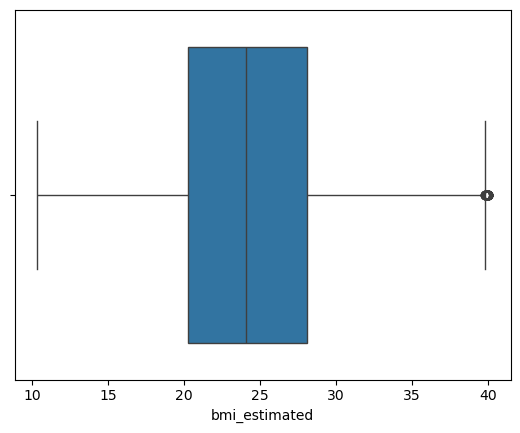

In [282]:
sns.boxplot(x='bmi_estimated',data=df)
plt.show()

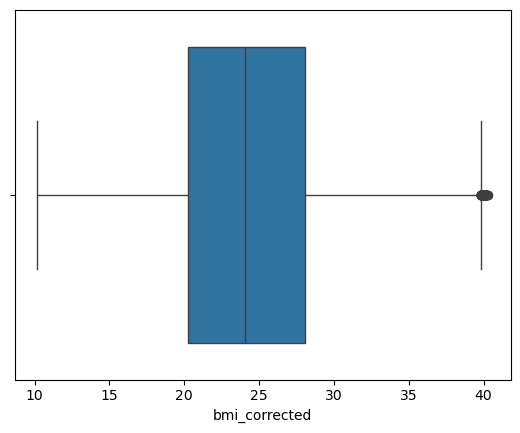

In [283]:
sns.boxplot(x='bmi_corrected',data=df)
plt.show()

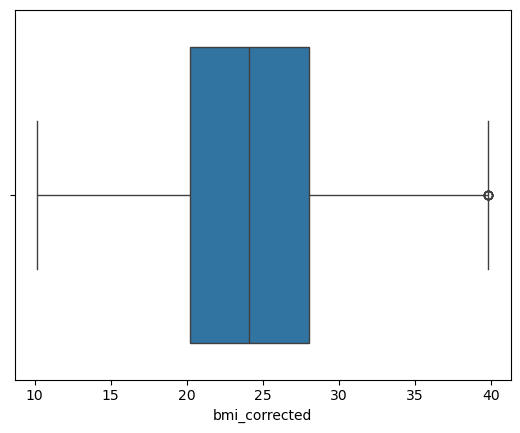

In [284]:

Q1 = df['bmi_corrected'].quantile(0.25)
Q3 = df['bmi_corrected'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['bmi_corrected'] >= lower_bound) & (df['bmi_corrected'] <= upper_bound)].reset_index(drop=True)


sns.boxplot(x='bmi_corrected',data=df)
plt.show()

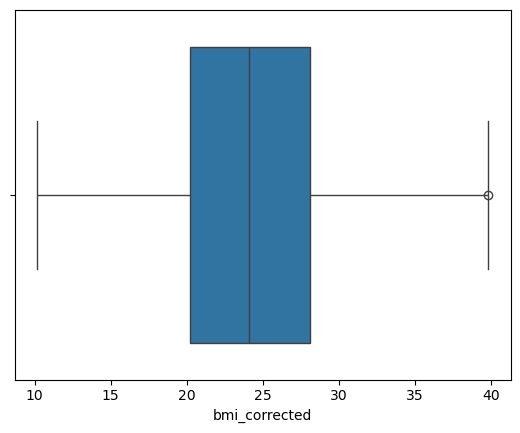

In [285]:

Q1 = df['bmi_corrected'].quantile(0.25)
Q3 = df['bmi_corrected'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['bmi_corrected'] >= lower_bound) & (df['bmi_corrected'] <= upper_bound)].reset_index(drop=True)


sns.boxplot(x='bmi_corrected',data=df)
plt.show()

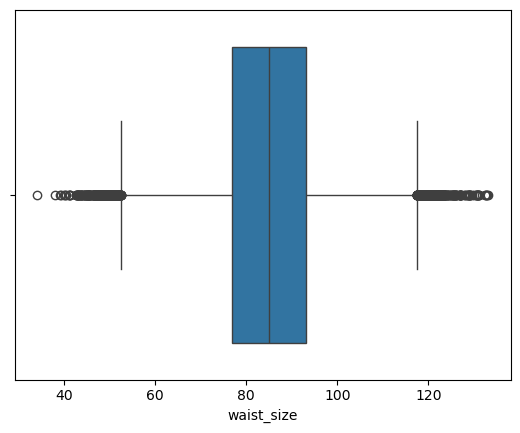

In [286]:
sns.boxplot(x='waist_size',data=df)
plt.show()

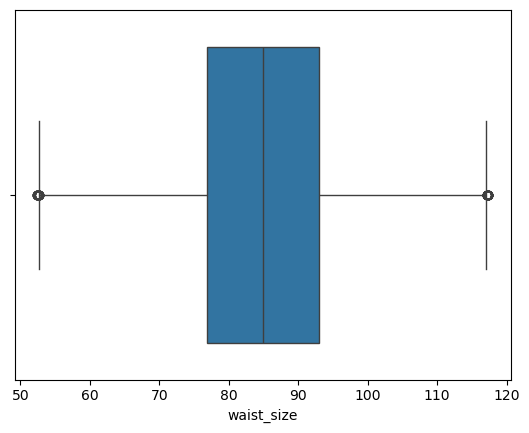

In [287]:

Q1 = df['waist_size'].quantile(0.25)
Q3 = df['waist_size'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['waist_size'] >= lower_bound) & (df['waist_size'] <= upper_bound)].reset_index(drop=True)


sns.boxplot(x='waist_size',data=df)
plt.show()

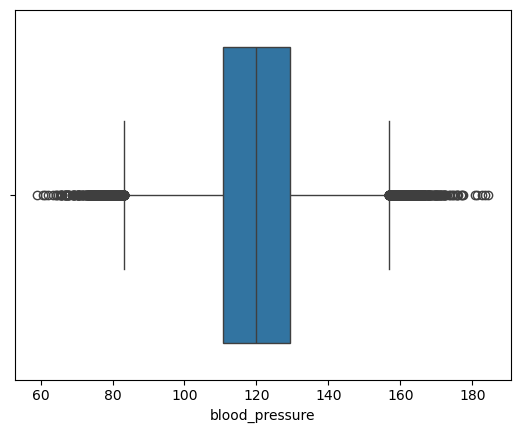

In [288]:
sns.boxplot(x='blood_pressure',data=df)
plt.show()

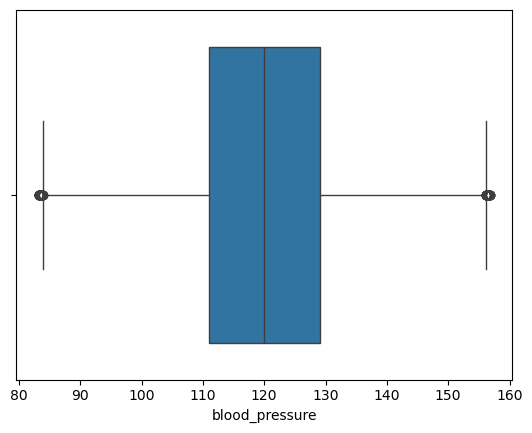

In [289]:

Q1 = df['blood_pressure'].quantile(0.25)
Q3 = df['blood_pressure'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['blood_pressure'] >= lower_bound) & (df['blood_pressure'] <= upper_bound)].reset_index(drop=True)


sns.boxplot(x='blood_pressure',data=df)
plt.show()

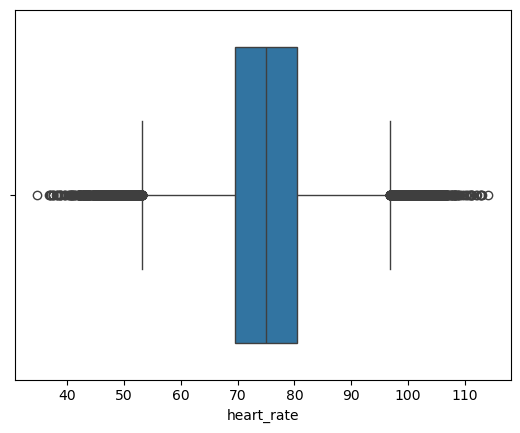

In [290]:
sns.boxplot(x='heart_rate',data=df)
plt.show()

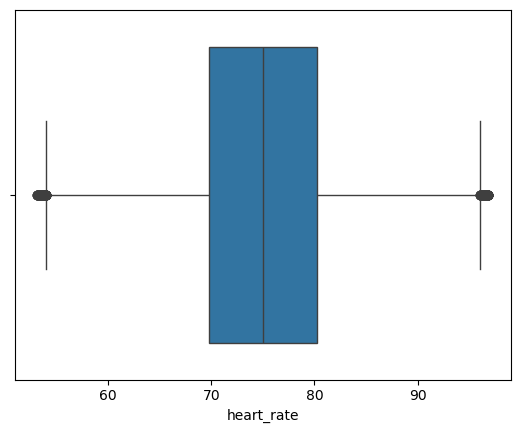

In [291]:

Q1 = df['heart_rate'].quantile(0.25)
Q3 = df['heart_rate'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['heart_rate'] >= lower_bound) & (df['heart_rate'] <= upper_bound)].reset_index(drop=True)


sns.boxplot(x='heart_rate',data=df)
plt.show()

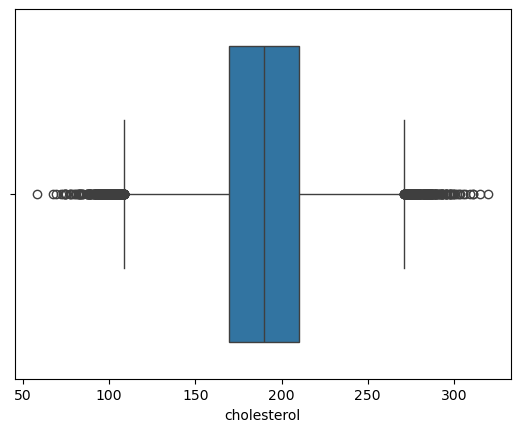

In [292]:
sns.boxplot(x='cholesterol',data=df)
plt.show()

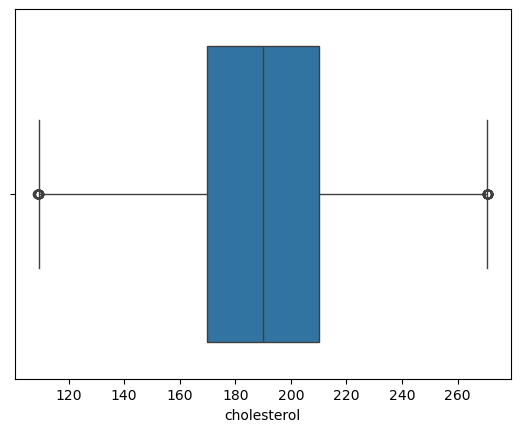

In [293]:

Q1 = df['cholesterol'].quantile(0.25)
Q3 = df['cholesterol'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['cholesterol'] >= lower_bound) & (df['cholesterol'] <= upper_bound)].reset_index(drop=True)


sns.boxplot(x='cholesterol',data=df)
plt.show()

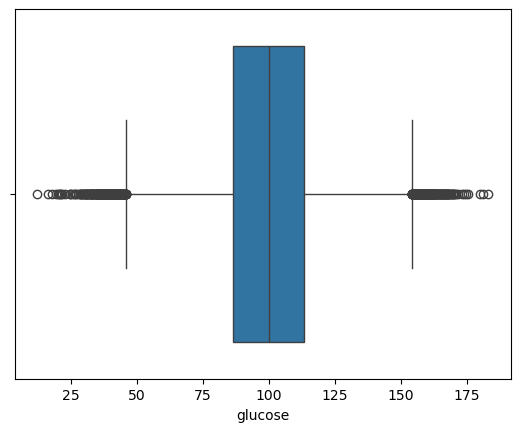

In [294]:
sns.boxplot(x='glucose',data=df)
plt.show()

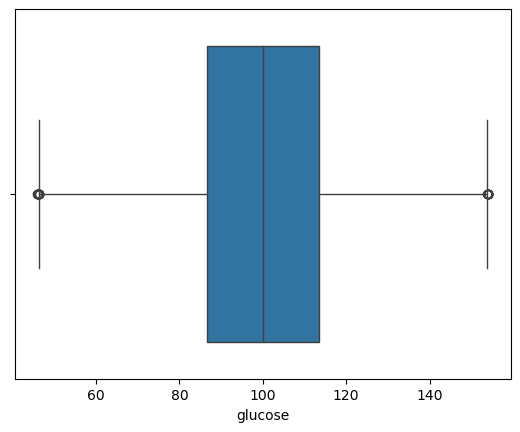

In [295]:

Q1 = df['glucose'].quantile(0.25)
Q3 = df['glucose'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['glucose'] >= lower_bound) & (df['glucose'] <= upper_bound)].reset_index(drop=True)


sns.boxplot(x='glucose',data=df)
plt.show()

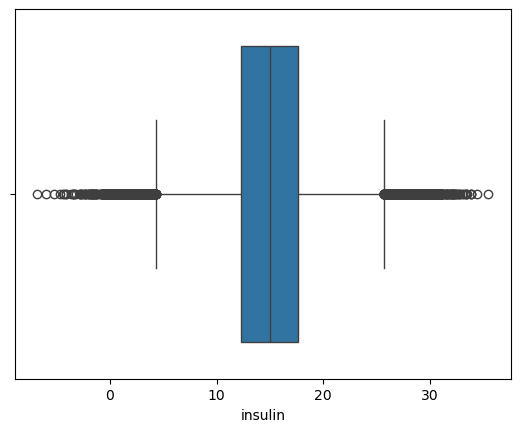

In [296]:
sns.boxplot(x='insulin',data=df)
plt.show()

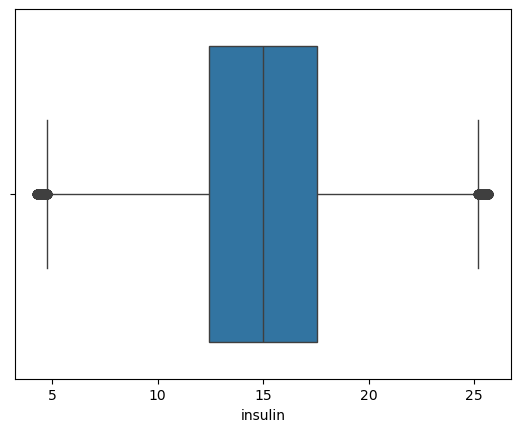

In [297]:

Q1 = df['insulin'].quantile(0.25)
Q3 = df['insulin'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['insulin'] >= lower_bound) & (df['insulin'] <= upper_bound)].reset_index(drop=True)


sns.boxplot(x='insulin',data=df)
plt.show()

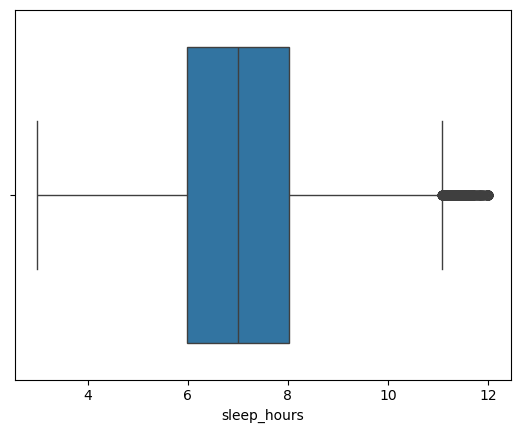

In [298]:
sns.boxplot(x='sleep_hours', data=df)
plt.show()

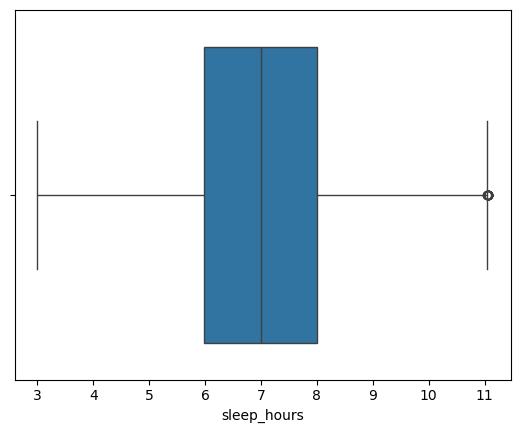

In [299]:

Q1 = df['sleep_hours'].quantile(0.25)
Q3 = df['sleep_hours'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['sleep_hours'] >= lower_bound) & (df['sleep_hours'] <= upper_bound)].reset_index(drop=True)


sns.boxplot(x='sleep_hours',data=df)
plt.show()

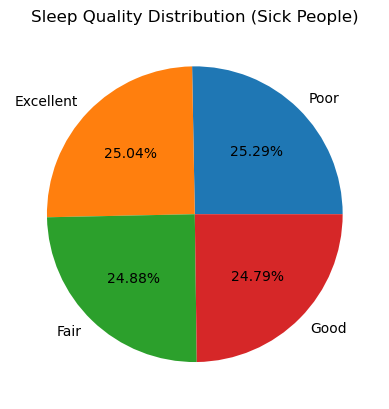

In [300]:
df[df['target'] == 0]['sleep_quality'].value_counts().plot(
    kind='pie', autopct='%.2f%%', ylabel='', title='Sleep Quality Distribution (Sick People)')
plt.show()

In [301]:
df.drop(columns='sleep_quality',axis=1,inplace=True)

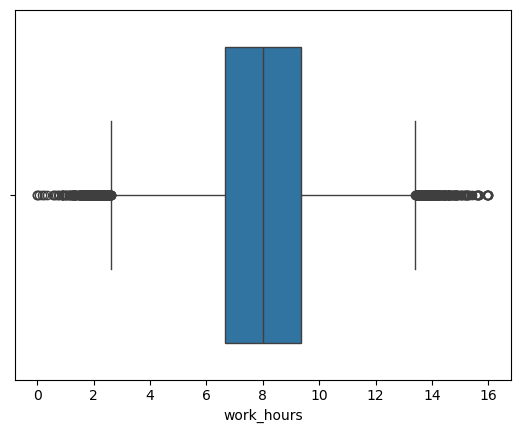

In [302]:
sns.boxplot(x='work_hours', data=df)
plt.show()

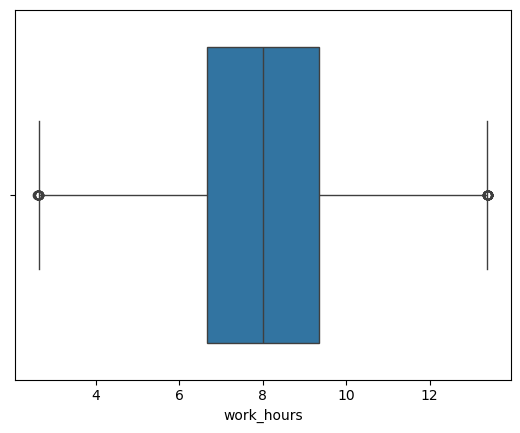

In [303]:

Q1 = df['work_hours'].quantile(0.25)
Q3 = df['work_hours'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['work_hours'] >= lower_bound) & (df['work_hours'] <= upper_bound)].reset_index(drop=True)


sns.boxplot(x='work_hours',data=df)
plt.show()

<Axes: xlabel='physical_activity'>

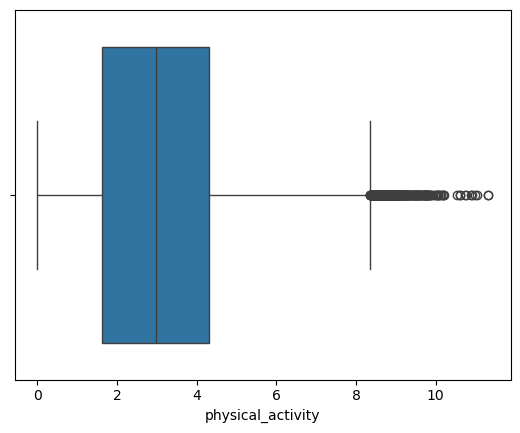

In [179]:
sns.boxplot(x='physical_activity',data=df)

<Axes: xlabel='physical_activity'>

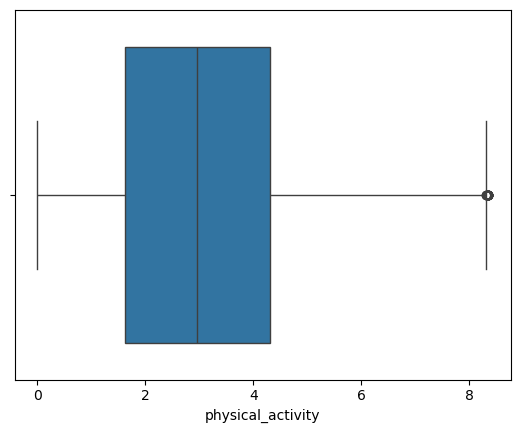

In [180]:

Q1 = df['physical_activity'].quantile(0.25)
Q3 = df['physical_activity'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['physical_activity'] >= lower_bound) & (df['physical_activity'] <= upper_bound)].reset_index(drop=True)


sns.boxplot(x='physical_activity',data=df)

<Axes: xlabel='daily_steps'>

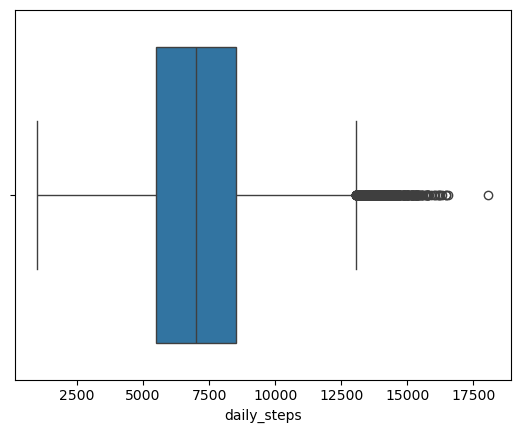

In [181]:
sns.boxplot(x='daily_steps', data=df)

<Axes: xlabel='daily_steps'>

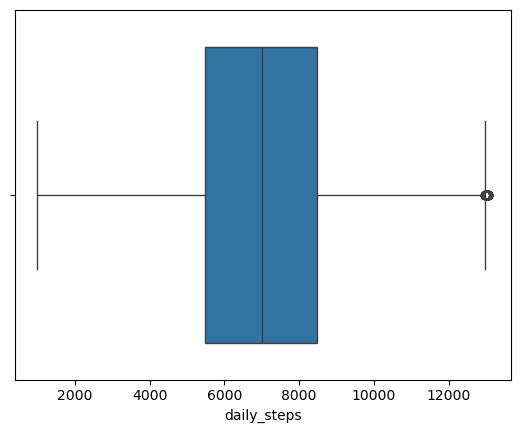

In [182]:
# Step 1: Calculate Q1, Q3, and IQR
Q1 = df['daily_steps'].quantile(0.25)
Q3 = df['daily_steps'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove rows with outlier weight values
df = df[(df['daily_steps'] >= lower_bound) & (df['daily_steps'] <= upper_bound)].reset_index(drop=True)


sns.boxplot(x='daily_steps',data=df)

<Axes: xlabel='calorie_intake'>

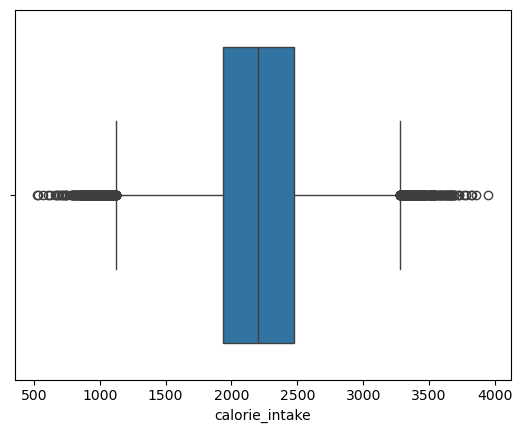

In [183]:
sns.boxplot(x='calorie_intake', data=df)

<Axes: xlabel='calorie_intake'>

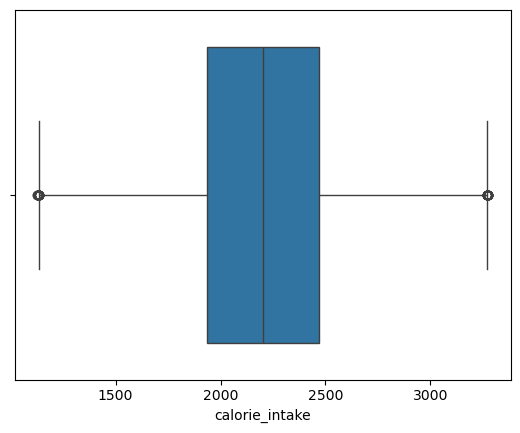

In [184]:

Q1 = df['calorie_intake'].quantile(0.25)
Q3 = df['calorie_intake'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['calorie_intake'] >= lower_bound) & (df['calorie_intake'] <= upper_bound)].reset_index(drop=True)


sns.boxplot(x='calorie_intake',data=df)

<Axes: xlabel='sugar_intake'>

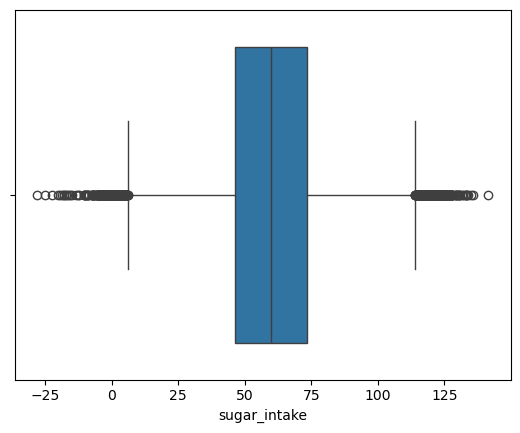

In [185]:
sns.boxplot(x='sugar_intake',data=df)

<Axes: xlabel='sugar_intake'>

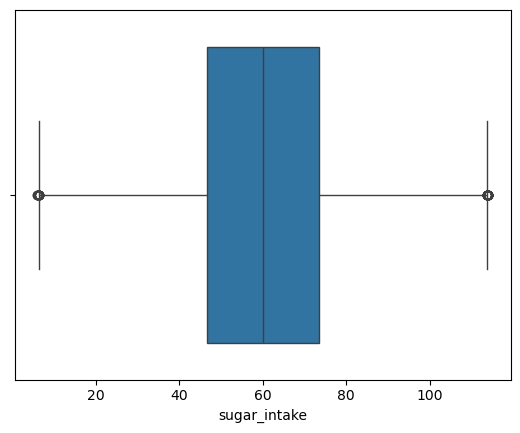

In [186]:

Q1 = df['sugar_intake'].quantile(0.25)
Q3 = df['sugar_intake'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['sugar_intake'] >= lower_bound) & (df['sugar_intake'] <= upper_bound)].reset_index(drop=True)


sns.boxplot(x='sugar_intake',data=df)

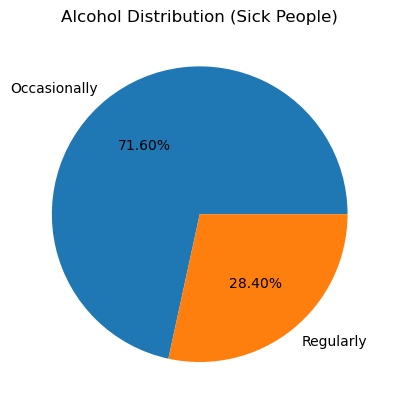

In [187]:
df[df['target'] == 0]['alcohol_consumption'].value_counts().plot(
    kind='pie', autopct='%.2f%%', ylabel='', title='Alcohol Distribution (Sick People)')
plt.show()

In [188]:
alcohol_order = [['Occasionally','Regularly']]
oe2 = OrdinalEncoder(categories=alcohol_order)
df['alcohol_consumption'] = oe2.fit_transform(df[['alcohol_consumption']])
df['alcohol_consumption']

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
86916    1.0
86917    0.0
86918    1.0
86919    1.0
86920    1.0
Name: alcohol_consumption, Length: 86921, dtype: float64

<Axes: ylabel='count'>

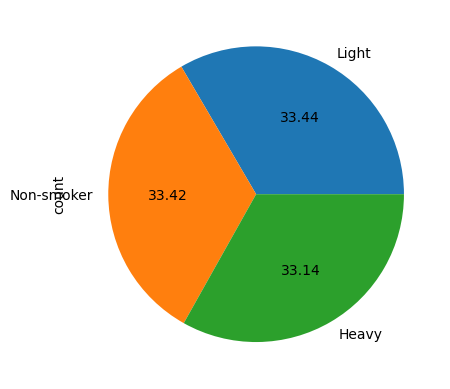

In [189]:
df['smoking_level'].value_counts().plot(kind = 'pie',autopct = '%.2f')

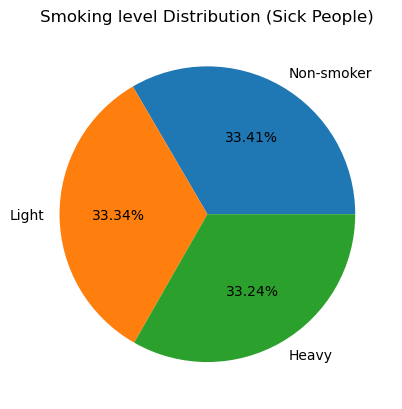

In [190]:
df[df['target'] == 0]['smoking_level'].value_counts().plot(
    kind='pie', autopct='%.2f%%', ylabel='', title='Smoking level Distribution (Sick People)')
plt.show()

In [191]:
smoking_order = [['Heavy','Light','Non-smoker']]
oe2 = OrdinalEncoder(categories=smoking_order)
df['smoking_level'] = oe2.fit_transform(df[['smoking_level']])
df['smoking_level'].head()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['smoking_level'] = scaler.fit_transform(df[['smoking_level']])

<Axes: xlabel='water_intake'>

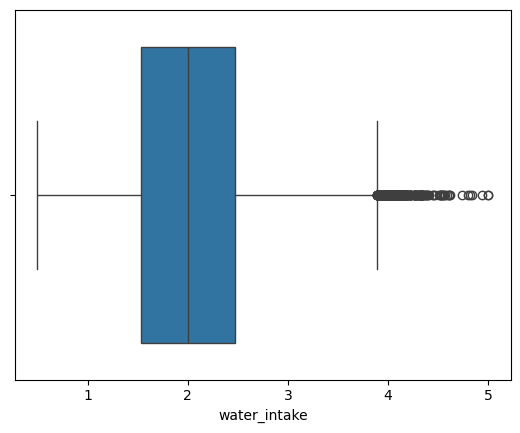

In [192]:
sns.boxplot(x='water_intake', data = df)

<Axes: xlabel='water_intake'>

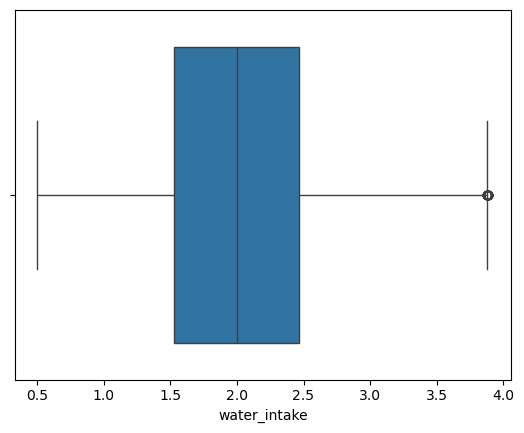

In [193]:

Q1 = df['water_intake'].quantile(0.25)
Q3 = df['water_intake'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['water_intake'] >= lower_bound) & (df['water_intake'] <= upper_bound)].reset_index(drop=True)


sns.boxplot(x='water_intake',data=df)

<Axes: xlabel='screen_time'>

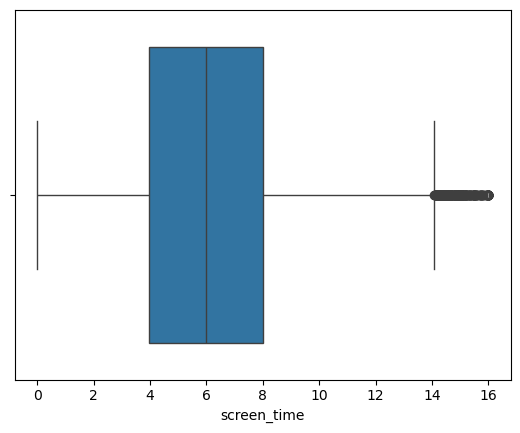

In [194]:
sns.boxplot(x='screen_time',data=df)

<Axes: xlabel='screen_time'>

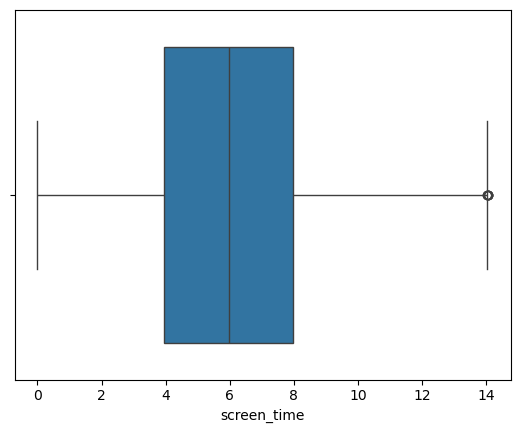

In [195]:

Q1 = df['screen_time'].quantile(0.25)
Q3 = df['screen_time'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['screen_time'] >= lower_bound) & (df['screen_time'] <= upper_bound)].reset_index(drop=True)


sns.boxplot(x='screen_time',data=df)

<Axes: xlabel='stress_level'>

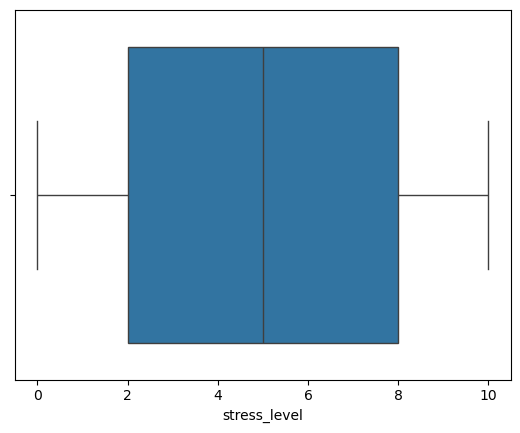

In [196]:
sns.boxplot(x='stress_level', data =df)

<Axes: xlabel='mental_health_score'>

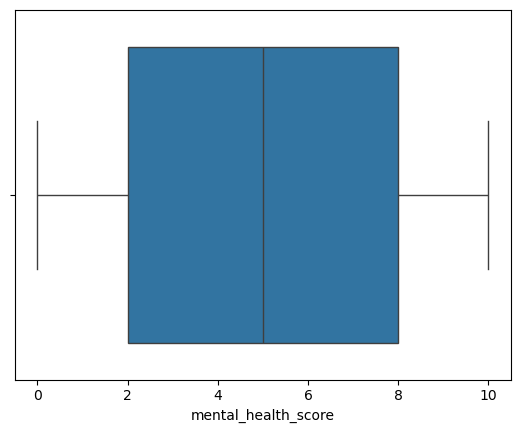

In [197]:
sns.boxplot(x='mental_health_score',data=df)

In [198]:
df['mental_health_support'].value_counts()

mental_health_support
No     43219
Yes    43110
Name: count, dtype: int64

<Axes: ylabel='count'>

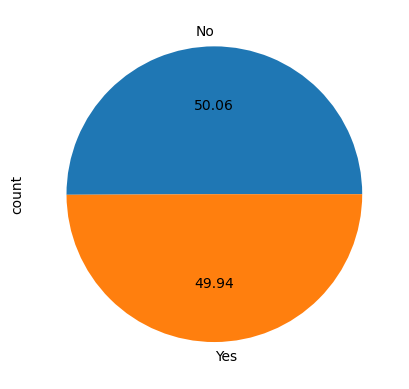

In [199]:
df['mental_health_support'].value_counts().plot(kind = 'pie',autopct = '%.2f')

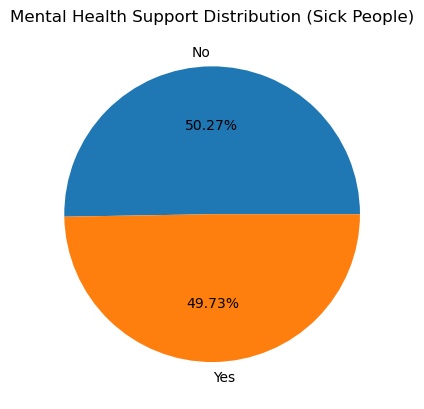

In [200]:
df[df['target'] == 0]['mental_health_support'].value_counts().plot(
    kind='pie', autopct='%.2f%%', ylabel='', title='Mental Health Support Distribution (Sick People)')
plt.show()

In [201]:
df.drop(columns='mental_health_support',axis=1,inplace=True)

In [202]:
df['education_level'].value_counts()

education_level
Bachelor       21893
Master         21551
High School    21546
PhD            21339
Name: count, dtype: int64

<Axes: ylabel='count'>

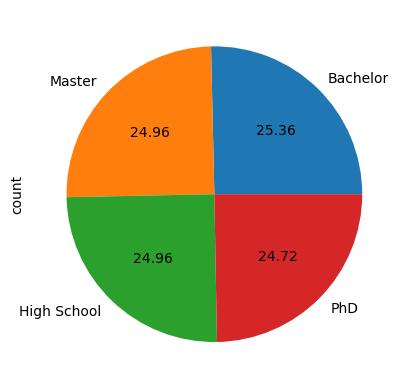

In [203]:
df['education_level'].value_counts().plot(kind = 'pie',autopct = '%.2f')

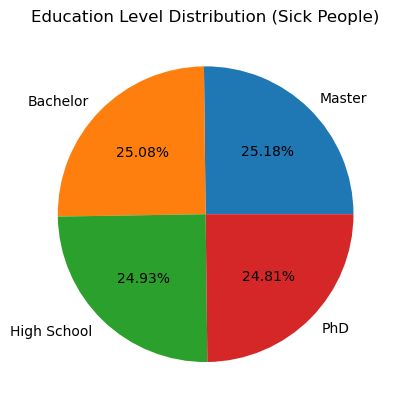

In [204]:
df[df['target'] == 0]['education_level'].value_counts().plot(
    kind='pie', autopct='%.2f%%', ylabel='', title='Education Level Distribution (Sick People)')
plt.show()

In [205]:
df.drop(columns='education_level', axis=1 , inplace=True)

In [206]:
df['job_type'].value_counts()

job_type
Labor         14466
Tech          14436
Office        14434
Unemployed    14408
Service       14308
Healthcare    14277
Name: count, dtype: int64

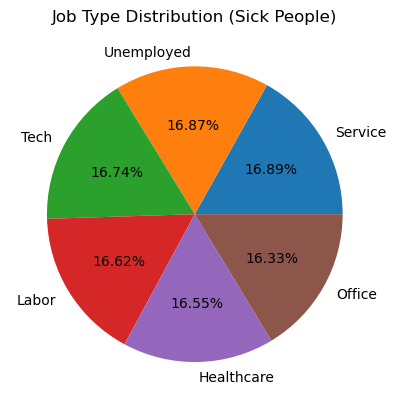

In [207]:
df[df['target'] == 0]['job_type'].value_counts().plot(
    kind='pie', autopct='%.2f%%', ylabel='', title='Job Type Distribution (Sick People)')
plt.show()

In [208]:
df.drop(columns='job_type',axis = 1, inplace=True)

In [209]:
df['occupation'].value_counts()

occupation
Doctor      14603
Farmer      14438
Teacher     14373
Driver      14352
Artist      14329
Engineer    14234
Name: count, dtype: int64

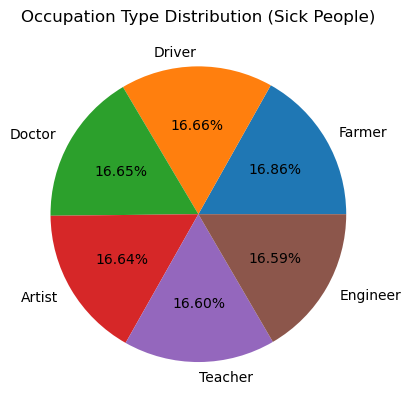

In [210]:
df[df['target'] == 0]['occupation'].value_counts().plot(
    kind='pie', autopct='%.2f%%', ylabel='', title='Occupation Type Distribution (Sick People)')
plt.show()

In [211]:
df.drop(columns='occupation', axis=1, inplace = True)

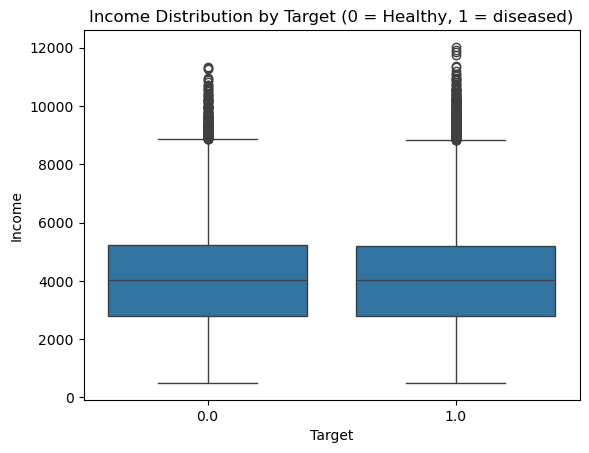

In [212]:
sns.boxplot(x='target', y='income', data=df)
plt.title("Income Distribution by Target (0 = Healthy, 1 = diseased)")
plt.xlabel("Target")
plt.ylabel("Income")
plt.show()

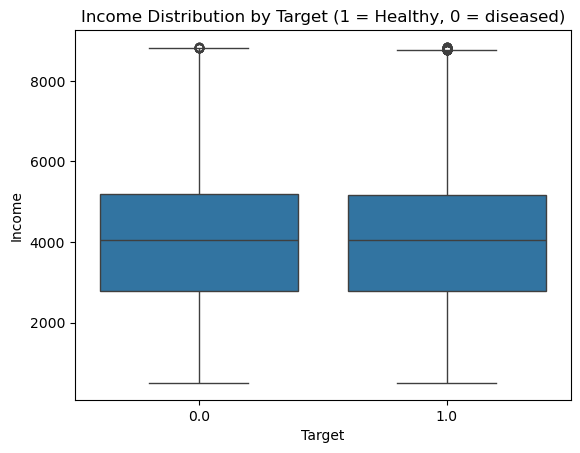

In [213]:

Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['income'] >= lower_bound) & (df['income'] <= upper_bound)].reset_index(drop=True)

sns.boxplot(x='target', y='income', data=df)
plt.title("Income Distribution by Target (1 = Healthy, 0 = diseased)")
plt.xlabel("Target")
plt.ylabel("Income")
plt.show()

In [214]:
df['diet_type'].value_counts()

diet_type
Omnivore      21580
Vegan         21508
Vegetarian    21455
Keto          21201
Name: count, dtype: int64

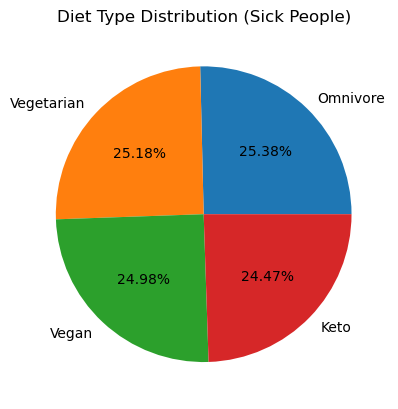

In [215]:
df[df['target'] == 0]['diet_type'].value_counts().plot(
    kind='pie', autopct='%.2f%%', ylabel='', title='Diet Type Distribution (Sick People)')
plt.show()

In [216]:
df.drop(columns='diet_type', axis =1, inplace=True)

In [217]:
df['exercise_type'].value_counts()

exercise_type
Strength    43029
Cardio      21466
Mixed       21249
Name: count, dtype: int64

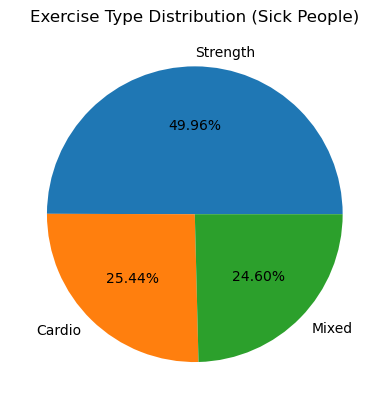

In [218]:
df[df['target'] == 0]['exercise_type'].value_counts().plot(
    kind='pie', autopct='%.2f%%', ylabel='', title='Exercise Type Distribution (Sick People)')
plt.show()

In [219]:
exercise_order = [['Mixed','Cardio','Strength']]

oe7 = OrdinalEncoder(categories=exercise_order)
df['exercise_type'] = oe7.fit_transform(df[['exercise_type']])
df['exercise_type'].head()

0    1.0
1    1.0
2    0.0
3    2.0
4    2.0
Name: exercise_type, dtype: float64

In [220]:
df['healthcare_access'].value_counts()

healthcare_access
Poor        28726
Good        28536
Moderate    28482
Name: count, dtype: int64

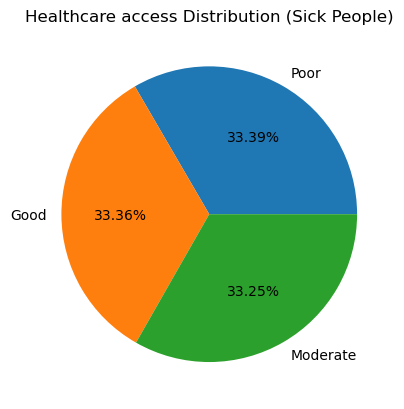

In [221]:
df[df['target'] == 0]['healthcare_access'].value_counts().plot(
    kind='pie', autopct='%.2f%%', ylabel='', title='Healthcare access Distribution (Sick People)')
plt.show()

In [222]:
df.drop(columns='healthcare_access', axis = 1, inplace = True)

In [223]:
df['sunlight_exposure'].value_counts()

sunlight_exposure
Low         28699
Moderate    28656
High        28389
Name: count, dtype: int64

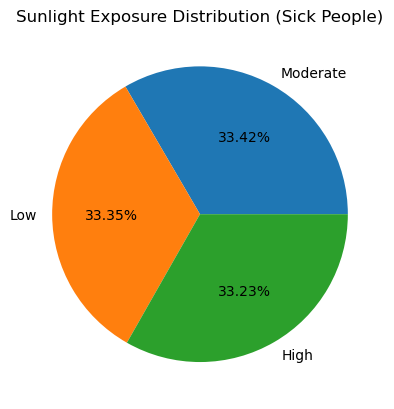

In [224]:
df[df['target'] == 0]['sunlight_exposure'].value_counts().plot(
    kind='pie', autopct='%.2f%%', ylabel='', title='Sunlight Exposure Distribution (Sick People)')
plt.show()

In [225]:
df.drop(columns='sunlight_exposure', axis = 1, inplace = True)

In [226]:
df['meals_per_day'].value_counts()

meals_per_day
3    17234
1    17204
4    17112
5    17106
2    17088
Name: count, dtype: int64

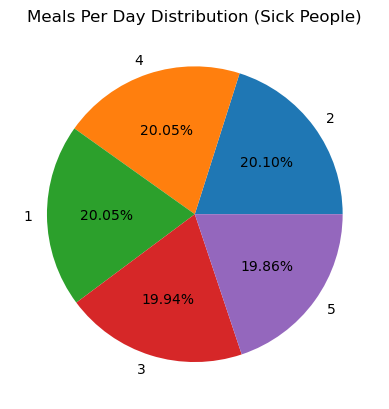

In [227]:
df[df['target'] == 0]['meals_per_day'].value_counts().plot(
    kind='pie', autopct='%.2f%%', ylabel='', title='Meals Per Day Distribution (Sick People)')
plt.show()

In [228]:
df.drop(columns='meals_per_day', axis = 1, inplace = True)

In [229]:
df['caffeine_intake'].value_counts()

caffeine_intake
Moderate    57131
High        28613
Name: count, dtype: int64

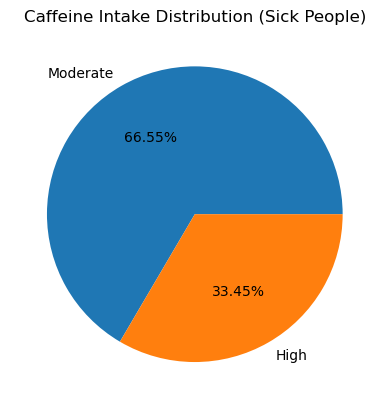

In [230]:
df[df['target'] == 0]['caffeine_intake'].value_counts().plot(
    kind='pie', autopct='%.2f%%', ylabel='', title='Caffeine Intake Distribution (Sick People)')
plt.show()

In [231]:
caffeine_order = [['Moderate','High']]

oe8 = OrdinalEncoder(categories=caffeine_order)
df['caffeine_intake'] = oe8.fit_transform(df[['caffeine_intake']])
df['caffeine_intake'].head()

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: caffeine_intake, dtype: float64

In [232]:
df['family_history'].value_counts()

family_history
Yes    42962
No     42782
Name: count, dtype: int64

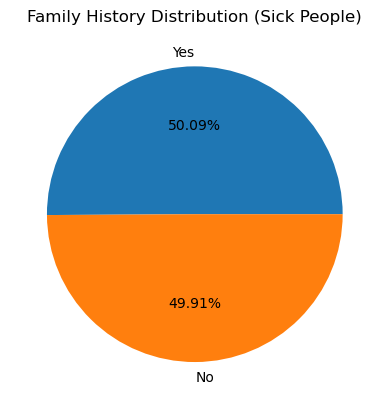

In [233]:
df[df['target'] == 0]['family_history'].value_counts().plot(
    kind='pie', autopct='%.2f%%', ylabel='', title='Family History Distribution (Sick People)')
plt.show()

In [234]:
df.drop(columns='family_history' , axis=1, inplace = True)

In [235]:
df['pet_owner'].value_counts()

pet_owner
No     43019
Yes    42725
Name: count, dtype: int64

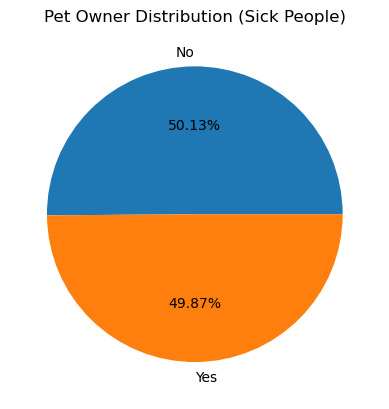

In [236]:
df[df['target'] == 0]['pet_owner'].value_counts().plot(
    kind='pie', autopct='%.2f%%', ylabel='', title='Pet Owner Distribution (Sick People)')
plt.show()

In [237]:
df.drop(columns='pet_owner' , axis=1, inplace = True)

In [238]:
df['electrolyte_level'].value_counts()

electrolyte_level
0    85744
Name: count, dtype: int64

In [239]:
df.drop(columns='electrolyte_level' , axis=1, inplace = True)

In [240]:
df['gene_marker_flag'].value_counts()

gene_marker_flag
1.0    85744
Name: count, dtype: int64

In [241]:
df.drop(columns='gene_marker_flag' , axis=1, inplace = True)

In [242]:
df['environmental_risk_score'].value_counts()

environmental_risk_score
5.5    85744
Name: count, dtype: int64

In [243]:
df.drop(columns='environmental_risk_score' , axis=1, inplace = True)

In [244]:
df['daily_supplement_dosage'].head()

0    6.239340
1    5.423737
2    8.388611
3    0.332622
4   -6.296536
Name: daily_supplement_dosage, dtype: float64

<Axes: xlabel='daily_supplement_dosage'>

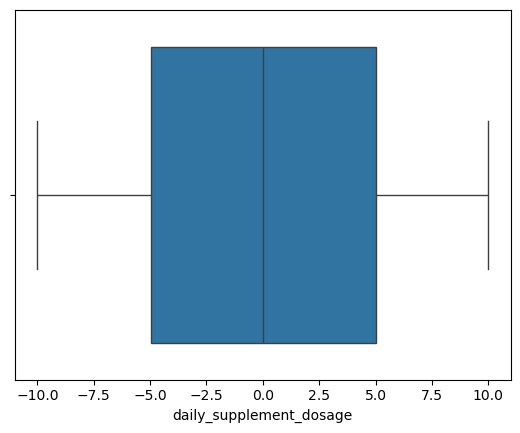

In [245]:
sns.boxplot(x='daily_supplement_dosage',data = df)

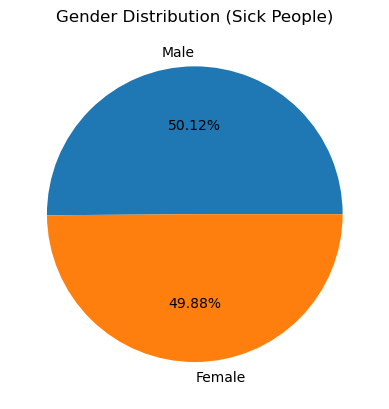

In [246]:
df[df['target'] == 0]['gender'].value_counts().plot(
    kind='pie', autopct='%.2f%%', ylabel='', title='Gender Distribution (Sick People)')
plt.show()

In [247]:
df.drop(columns='gender',axis=1,inplace=True)

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85744 entries, 0 to 85743
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      85744 non-null  int64  
 1   height                   85744 non-null  float64
 2   weight                   85744 non-null  float64
 3   bmi                      85744 non-null  float64
 4   bmi_estimated            85744 non-null  float64
 5   bmi_scaled               85744 non-null  float64
 6   bmi_corrected            85744 non-null  float64
 7   waist_size               85744 non-null  float64
 8   blood_pressure           85744 non-null  float64
 9   heart_rate               85744 non-null  float64
 10  cholesterol              85744 non-null  float64
 11  glucose                  85744 non-null  float64
 12  insulin                  85744 non-null  float64
 13  sleep_hours              85744 non-null  float64
 14  work_hours            

In [249]:
X = df.drop(columns='target')
y = df['target']

In [250]:
from sklearn.model_selection import train_test_split

In [251]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [252]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [253]:
model = LogisticRegression(class_weight={0: 0.6905, 1: 0.3095})
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.6905, 1: 0.3095})

In [254]:
y_pred = model.predict(X_test)

In [255]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6913522654382179
Confusion Matrix:
 [[   45  5174]
 [  119 11811]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.27      0.01      0.02      5219
         1.0       0.70      0.99      0.82     11930

    accuracy                           0.69     17149
   macro avg       0.48      0.50      0.42     17149
weighted avg       0.57      0.69      0.57     17149



In [256]:
from sklearn.tree import DecisionTreeClassifier

In [257]:
dt = DecisionTreeClassifier()

In [258]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [259]:
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.5712286430695668

In [260]:
from sklearn.ensemble import RandomForestClassifier

In [261]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

In [262]:
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [263]:
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.6957256982914456